# Pandas Test - Real life Exercise

In [4]:
import pandas as pd
import numpy as np

For visualizations:

In [5]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [105]:
ad_recs_annotated = pd.read_csv('data/Final assigment/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
110264,2021-week_40,AD00FIYCYC,Tab Solutions,JP,yes,NaN,Qality,DNNQ
336668,2022-week_05,AD08889888,Puentes Company,IN,yes,NaN,Qality,UserPopQ
61653,2021-week_37,AD000J66XP,MoJoe Brewing Company,GB,yes,NaN,Yield,DNNY
303134,2022-week_03,AD07NCZ8R8,Search Million Culture,GB,yes,NaN,Qality,DNNQ
287425,2022-week_02,AD08FR86H9,Search Million Culture,DE,yes,NaN,Qality,DNNQ


In [7]:
most_pop_ad = ad_recs_annotated.ad_id.value_counts().idxmax()

In [8]:
q = f'ad_id == "{most_pop_ad}"'
q

'ad_id == "AD07PFFMP9"'

In [9]:
ad_recs_annotated.query('ad_id == @most_pop_ad')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

solution of q. 1

In [120]:
ad_recs_annotated['year'] = pd.to_numeric(ad_recs_annotated.apply(lambda x: x["week_id"].split("-week_")[0], axis=1))
ad_recs_annotated['week_number'] = pd.to_numeric(ad_recs_annotated.apply(lambda x: x["week_id"].split("-week_")[1], axis=1))

In [35]:
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week_number,sample_quarter,success
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,False,Qality,DNNQ,2021,33,3,1
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,False,Yield,DNNY,2021,33,3,1
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,False,Qality,DNNQ,2021,33,3,1
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,False,Qality,BooksQ,2021,33,3,1
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,False,Qality,DNNQ,2021,33,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,Yes,False,Yield,DNNY,2022,52,4,1
373784,2022-week_52,AD07C8XSMN,Fancy,US,Yes,False,Qality,RNNQ,2022,52,4,1
373785,2022-week_52,AD096LRR88,Extreme DA,US,Yes,False,Yield,DNNY,2022,52,4,1
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,False,Qality,DNNQ,2022,52,4,1


solution of q. 2

in order to get quarters, first i need to extract a date from the year and the week of the year,
and then i'm getting the day before te date because i'm getting the last day of the week - it causes problems with week 52 in year 22, im getting the date of the first day of 2023 (hence quarter 1 instead of 4)

In [248]:
date = ad_recs_annotated.apply(lambda x: pd.to_numeric(x['year'])*100+pd.to_numeric(x["week_id"].split("-week_")[1]), axis=1)
date = pd.to_datetime(date.astype(str) + '0', format='%Y%W%w')
date = date - pd.tseries.offsets.DateOffset(days=1)
ad_recs_annotated['date']=date
quarter = date.dt.quarter
ad_recs_annotated['sample_quarter'] = quarter
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week_number,sample_quarter,success,date
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,False,Qality,DNNQ,2021,33,3,1,2021-08-21
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,False,Yield,DNNY,2021,33,3,1,2021-08-21
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,False,Qality,DNNQ,2021,33,3,1,2021-08-21
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,False,Qality,BooksQ,2021,33,3,1,2021-08-21
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,False,Qality,DNNQ,2021,33,3,1,2021-08-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,yes,False,Yield,DNNY,2022,52,4,1,2022-12-31
373784,2022-week_52,AD07C8XSMN,Fancy,US,yes,False,Qality,RNNQ,2022,52,4,1,2022-12-31
373785,2022-week_52,AD096LRR88,Extreme DA,US,yes,False,Yield,DNNY,2022,52,4,1,2022-12-31
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,yes,False,Qality,DNNQ,2022,52,4,1,2022-12-31


solution of q. 3

In [215]:
ad_recs_annotated['success'] = ad_recs_annotated.apply(lambda x: 1 if x["is_success"]=='yes' else 0, axis=1)

In [14]:
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week_number,sample_quarter,success
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,33,3,1
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021,33,3,1
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,33,3,1
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,33,3,1
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,33,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,yes,NaN,Yield,DNNY,2022,52,4,1
373784,2022-week_52,AD07C8XSMN,Fancy,US,yes,NaN,Qality,RNNQ,2022,52,4,1
373785,2022-week_52,AD096LRR88,Extreme DA,US,yes,NaN,Yield,DNNY,2022,52,4,1
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,yes,NaN,Qality,DNNQ,2022,52,4,1


solution of q. 4

In [234]:
ad_recs_annotated['is_sever'].isnull().sum()

ad_recs_annotated['is_sever'].count()

ad_recs_annotated['is_sever'].fillna(False,inplace=True)

ad_recs_annotated['is_sever'].isnull().sum()

0

In [16]:
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week_number,sample_quarter,success
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,False,Qality,DNNQ,2021,33,3,1
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,False,Yield,DNNY,2021,33,3,1
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,False,Qality,DNNQ,2021,33,3,1
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,False,Qality,BooksQ,2021,33,3,1
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,False,Qality,DNNQ,2021,33,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,yes,False,Yield,DNNY,2022,52,4,1
373784,2022-week_52,AD07C8XSMN,Fancy,US,yes,False,Qality,RNNQ,2022,52,4,1
373785,2022-week_52,AD096LRR88,Extreme DA,US,yes,False,Yield,DNNY,2022,52,4,1
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,yes,False,Qality,DNNQ,2022,52,4,1


solution of q. 5

In [17]:
ad_recs_annotated['is_success'] = ad_recs_annotated['is_success'].str.capitalize()

In [18]:
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week_number,sample_quarter,success
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,False,Qality,DNNQ,2021,33,3,1
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,False,Yield,DNNY,2021,33,3,1
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,False,Qality,DNNQ,2021,33,3,1
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,False,Qality,BooksQ,2021,33,3,1
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,False,Qality,DNNQ,2021,33,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,Yes,False,Yield,DNNY,2022,52,4,1
373784,2022-week_52,AD07C8XSMN,Fancy,US,Yes,False,Qality,RNNQ,2022,52,4,1
373785,2022-week_52,AD096LRR88,Extreme DA,US,Yes,False,Yield,DNNY,2022,52,4,1
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,False,Qality,DNNQ,2022,52,4,1


### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [19]:
# q1
ad_recs_annotated.region.value_counts()

US    103846
IN     83154
GB     82984
DE     62177
JP     41627
Name: region, dtype: int64

In [20]:
# q2
ad_recs_annotated.groupby('region').is_success.value_counts()

region  is_success
DE      Yes           50624
        No            11553
GB      Yes           69509
        No            13475
IN      Yes           63355
        No            19799
JP      Yes           31800
        No             9827
US      Yes           88918
        No            14928
Name: is_success, dtype: int64

In [21]:
# q3
ad_recs_annotated.query('region=="US" & week_number == 52').is_success.value_counts()

Yes    3342
No      656
Name: is_success, dtype: int64

In [22]:
# q4 How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
ad_recs_annotated.query('rec_provider in ["DNNQ","RNNY","UserPopQ"]').rec_provider.count()

200093

In [23]:
# q5 How many requests where delivered by rule based providers? 
ad_recs_annotated.rec_provider.value_counts()

DNNQ                 117424
UserPopQ              69937
DNNY                  45116
UserPopY              38600
RuleBasedY            28154
RNNQ                  20983
ManualQ               13844
RNNY                  12732
XGBQ                  12250
XGBY                   4276
BooksY                 4150
UserPopSelectionQ      2417
ManualY                1982
BooksQ                 1720
RuleBased               182
UserPopSelectionY        21
Name: rec_provider, dtype: int64

In [24]:
# q6 Select only the requests from 2021 - How many are there? 
ad_recs_annotated.query('year == 2021').year.count()

271615

In [25]:
# q7 Select the reqeusts from week 30 to week 40 - How many are there? 
ad_recs_annotated.query('week_number >= 30 & week_number<=40').week_number.count()

115051

In [26]:
# q8 Select all the data that comes from the most popular Ad
most_pop_ad = ad_recs_annotated.ad_id.value_counts().idxmax()
ad_recs_annotated.query('ad_id == @most_pop_ad')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week_number,sample_quarter,success
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,False,Yield,ManualQ,2021,33,3,1
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,False,Yield,ManualQ,2021,33,3,1
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,Yes,False,Yield,ManualQ,2021,34,3,1
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,Yes,False,Yield,ManualQ,2021,34,3,1
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,Yes,False,Yield,ManualQ,2021,35,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,False,Yield,ManualQ,2022,52,4,1
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,False,Yield,ManualQ,2022,52,4,1
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,Yes,False,Yield,ManualQ,2022,52,4,1
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,False,Yield,ManualQ,2022,52,4,1


In [27]:
# q9 Select all the data that comes from the least popular provider
least_pop_ad = ad_recs_annotated.ad_id.value_counts().idxmin()
ad_recs_annotated.query('ad_id == @least_pop_ad')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week_number,sample_quarter,success
251351,2021-week_50,AD08ZLWHHR,RelayFoods,IN,Yes,False,Qality,UserPopQ,2021,50,4,1


In [28]:
# q10 Select the data in which is_sever is None. How big is it? 
ad_recs_annotated['is_sever'][ad_recs_annotated['is_sever'] == "None"]

Series([], Name: is_sever, dtype: bool)

In [29]:
# q11 Select the data in which the requester is a 3 word company
ad_recs_annotated.loc[ad_recs_annotated.apply(lambda x: len(x["requester"].split())==3, axis=1)]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week_number,sample_quarter,success
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,False,Qality,DNNQ,2021,33,3,1
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,False,Yield,DNNY,2021,33,3,1
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,False,Qality,DNNQ,2021,33,3,1
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,False,Qality,BooksQ,2021,33,3,1
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,False,Qality,DNNQ,2021,33,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
373663,2022-week_52,AD09G98VJZ,MoJoe Brewing Company,US,Yes,False,Yield,RNNY,2022,52,4,1
373689,2022-week_52,AD078WDG8W,MoJoe Brewing Company,US,Yes,False,Yield,RNNY,2022,52,4,1
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,False,Yield,DNNY,2022,52,4,1
373722,2022-week_52,AD09C8X6VY,Search Million Culture,US,Yes,False,Qality,DNNQ,2022,52,4,1


In [30]:
# q12 Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
ad_recs_annotated.loc[ad_recs_annotated.apply(lambda x: len(x["requester"].split())==3, axis=1) & ad_recs_annotated.apply(lambda x: "6" in str(x["ad_id"]), axis=1)]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week_number,sample_quarter,success
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,False,Qality,DNNQ,2021,33,3,1
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,False,Qality,BooksQ,2021,33,3,1
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,False,Qality,DNNQ,2021,33,3,1
11,2021-week_33,AD88967068,Search Million Culture,DE,Yes,False,Qality,BooksQ,2021,33,3,1
41,2021-week_33,AD07L6JC8W,MoJoe Brewing Company,DE,Yes,False,Yield,DNNY,2021,33,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
373364,2022-week_52,AD06XJR86M,MoJoe Brewing Company,US,Yes,False,Yield,RuleBasedY,2022,52,4,1
373394,2022-week_52,AD08Y6R9WV,MoJoe Brewing Company,US,Yes,False,Yield,DNNY,2022,52,4,1
373511,2022-week_52,AD09C68T8Y,MoJoe Brewing Company,US,Yes,False,Yield,DNNY,2022,52,4,1
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,False,Yield,DNNY,2022,52,4,1


In [31]:
# q13 Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30
def multiply_digits(str_number):
    final = 1
    for dig in str_number:
        final *= int(dig)
    return final

ad_recs_annotated[ad_recs_annotated['ad_id'].str.replace('\D+', '').apply(lambda x: multiply_digits(x)>30) & ad_recs_annotated.apply(lambda x: len(x["requester"].split())==3, axis=1)]

C:\Users\lior\AppData\Local\Temp\ipykernel_6596\1764571250.py:8: FutureWarning:

The default value of regex will change from True to False in a future version.



,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week_number,sample_quarter,success
37,2021-week_33,AD88898888,Search Million Culture,DE,Yes,False,Qality,BooksQ,2021,33,3,1
76,2021-week_33,AD88898786,MoJoe Brewing Company,DE,Yes,False,Yield,BooksY,2021,33,3,1
112,2021-week_33,AD88788887,Search Million Culture,DE,Yes,False,Qality,BooksQ,2021,33,3,1
162,2021-week_33,AD88887688,Search Million Culture,DE,Yes,False,Qality,BooksQ,2021,33,3,1
174,2021-week_33,AD88888876,Search Million Culture,DE,Yes,False,Qality,BooksQ,2021,33,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
360315,2022-week_52,AD89888888,MoJoe Brewing Company,GB,Yes,False,Yield,ManualQ,2022,52,4,1
362075,2022-week_52,AD88888997,Search Million Culture,GB,Yes,False,Qality,UserPopQ,2022,52,4,1
362199,2022-week_52,AD88688888,Mission Street Manufacturing,GB,No,False,Qality,UserPopQ,2022,52,4,0
363286,2022-week_52,AD88887888,Search Million Culture,GB,Yes,False,Qality,UserPopQ,2022,52,4,1


### Analysis

df.index1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


In [79]:
# 1. How many regions available in the data? Are there any missing weeks per region? 
# ad_recs_annotated['region'].value_counts()
weeks_per_region = ad_recs_annotated.groupby('region')['week_number'].apply(set).to_dict()
print(weeks_per_region)
# ad_recs_annotated.groupby(['region','week_number','year']).count()
# ad_recs_annotated[['region','week_number','year']].groupby('region').value_counts()

{'DE': {1, 2, 3, 4, 5, 6, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52}, 'GB': {1, 2, 3, 4, 5, 6, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52}, 'IN': {1, 2, 3, 4, 5, 6, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52}, 'JP': {1, 2, 3, 4, 5, 6, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52}, 'US': {1, 2, 3, 4, 5, 6, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52}}


In [81]:
# 2. How many ads are being sent to annotation in each region per week?
ad_recs_annotated.groupby(['region','week_number'])['week_number'].count()

region  week_number
DE      1              2402
        2              2394
        3              2378
        4              2365
        5              2382
                       ... 
US      48             4010
        49             3994
        50             3991
        51             3996
        52             3998
Name: week_number, Length: 129, dtype: int64

In [106]:
# 3. How many None values are there in is_sever column?
ad_recs_annotated['is_sever'].isna().sum()

304195

In [92]:
# 4. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
ad_recs_annotated.groupby(['week_number','ad_id'])['ad_id'].count().reset_index(name='count').sort_values('count',ascending=False)

,week_number,ad_id,count
192748,40,AD098SWYF6,81
284284,47,AD08C8RR8J,70
281359,47,AD07QS8VCL,58
277683,47,AD00IGCC8G,56
287896,47,AD098C6SNV,55
...,...,...,...
120961,35,AD08E8EHRV,1
120960,35,AD08E888KK,1
120959,35,AD08E808G0,1
120958,35,AD08E7KQ8W,1


In [104]:
# 5. Are there ads that are being sent in more than one week?
   # A. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   # B. What are the weeks that the ad from above was sent in? 
   # C. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
ad_recs_annotated.groupby('ad_id')['week_number'].nunique().reset_index(name='count').sort_values('count',ascending=False)
ad_recs_annotated.groupby('ad_id').unique()
ad_recs_annotated.groupby(['ad_id','is_success'])['week_number'].nunique().reset_index(name='count').sort_values('ad_id',ascending=False)

,ad_id,is_success,count
306144,ADOO8X898E,Yes,2
306143,AD99798888,No,1
306142,AD98988898,Yes,2
306141,AD98988688,Yes,1
306140,AD98980890,Yes,1
...,...,...,...
4,AD0000088C,Yes,1
3,AD00000888,Yes,2
2,AD00000876,Yes,1
1,AD000000WF,Yes,1


In [109]:
# 6. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
ad_recs_annotated[ad_recs_annotated.is_sever.isna()].is_success.value_counts()
# is na due to the fact that it was not sever, only 6 out of 304195 was not successful

yes    304189
no          6
Name: is_success, dtype: int64

In [128]:
# 7. Per each region, What is the Quality/Yield traffic proportion WoW? 
Quality = ad_recs_annotated[ad_recs_annotated['recommendation_type']=='Qality'].groupby(['region','week_number']).recommendation_type.count()
Yield = ad_recs_annotated[ad_recs_annotated['recommendation_type']=='Yield'].groupby(['region','week_number']).recommendation_type.count()
Quality.div(Yield)

region  week_number
DE      1              5.388298
        2              5.523161
        3              3.784708
        4              6.232416
        5              4.631206
                         ...   
US      48             0.446087
        49             1.051361
        50             0.877234
        51             0.433286
        52             0.481289
Name: recommendation_type, Length: 129, dtype: float64

In [131]:
# 8. How many different reqeusters are there? 
len(ad_recs_annotated.requester.unique())

36

In [144]:
# 9. Which are the top 5 requesters per region? 
ad_recs_annotated.groupby(['region','requester']).requester.count().reset_index(name='count').sort_values('count',ascending=False).value_counts()
# .requester.count().reset_index(name='count').sort_values('count',ascending=False)

region  requester                     count
DE      Allthetopbananas.com          51       1
JP      Pole Star                     47       1
US      Cue                           4        1
        Crescendo Networks            82       1
        Bizanga                       211      1
                                              ..
GB      OpenDesks, Inc.               72       1
        Modanisa                      1117     1
        MoJoe Brewing Company         9530     1
        Mission Street Manufacturing  86       1
US      iDreamsky Technology          1137     1
Length: 110, dtype: int64

In [145]:
# 10. Which are the different rec_proivders?
ad_recs_annotated.rec_provider.unique()

array(['DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', 'UserPopY', 'RuleBasedY',
       'ManualY', 'ManualQ', 'BooksY', 'XGBQ', 'XGBY', 'RNNQ', 'RNNY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

In [148]:
# 11. Are there different rec providers per region? 
ad_recs_annotated.groupby(['region']).rec_provider.unique()

region
DE    [DNNQ, DNNY, BooksQ, UserPopQ, UserPopY, RuleB...
GB    [DNNY, XGBQ, DNNQ, XGBY, RNNQ, UserPopQ, Manua...
IN    [UserPopY, RuleBasedY, UserPopQ, ManualY, Manu...
JP    [ManualQ, UserPopQ, RuleBasedY, DNNQ, ManualY,...
US    [DNNY, ManualQ, DNNQ, UserPopY, XGBY, RNNY, Ma...
Name: rec_provider, dtype: object

In [149]:
# 12. Are there different rec providers per rec type?
ad_recs_annotated.groupby(['recommendation_type']).rec_provider.unique()

recommendation_type
Qality    [DNNQ, BooksQ, UserPopQ, ManualY, ManualQ, XGB...
Yield     [DNNY, UserPopY, RuleBasedY, BooksY, ManualY, ...
Name: rec_provider, dtype: object

In [ ]:
# 13. What are the notation rules distinguishing between quality vs yielding providers?


In [176]:
# 14. Which is the most successful region of operation? 
y= ad_recs_annotated[ad_recs_annotated['is_success']=='yes'].region.value_counts().reset_index(name='count')
n = ad_recs_annotated[ad_recs_annotated['is_success']=='no'].region.value_counts().reset_index(name='count')
n.head()
y['success_rate']=y['count']/(n['count']+y['count'])
y.sort_values('success_rate',ascending=False)
# ad_recs_annotated.region.value_counts()
# .div(ad_recs_annotated.groupby('is_success').region.sum())

,index,count,success_rate
2,IN,63355,0.824613
1,GB,69509,0.823205
0,US,88918,0.817885
3,DE,50624,0.814192
4,JP,31800,0.763927


In [182]:
# 15. Which is the most successful rec provider per each region? 
y = ad_recs_annotated[ad_recs_annotated['is_success']=='yes'].groupby('region').rec_provider.value_counts().reset_index(name='count')
n = ad_recs_annotated[ad_recs_annotated['is_success']=='no'].groupby('region').rec_provider.value_counts().reset_index(name='count')
y['success_rate'] = y['count']/(n['count']+y['count'])
y.sort_values('success_rate',ascending=False)

,region,rec_provider,count,success_rate
20,GB,RuleBased,39,0.975000
48,US,BooksQ,357,0.972752
49,US,RuleBased,131,0.970370
46,US,UserPopQ,1227,0.966903
8,DE,ManualY,581,0.960331
24,IN,ManualQ,5041,0.952390
7,DE,ManualQ,830,0.951835
47,US,ManualY,451,0.951477
45,US,XGBQ,2547,0.947897
25,IN,ManualY,212,0.942222


In [224]:
# 16. Present a table with a success rate, sever defects rate and CI (for each metric) per region

from scipy.stats import t

result = ad_recs_annotated.groupby('region').agg({
    'success': ['mean', lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[0], 
                             lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[1]],
    'is_sever': ['mean', lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[0], 
                             lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[1]]
})
result.columns = ['success_rate', 'success_ci_lower', 'success_ci_upper', 
                  'sever_rate', 'sever_ci_lower', 'sever_ci_upper']
print(result)

        success_rate  success_ci_lower  success_ci_upper  sever_rate  \
region                                                                 
DE          0.814192          0.811134          0.817249    0.611198   
GB          0.837619          0.835110          0.840129    0.736791   
IN          0.761900          0.759005          0.764795    0.592578   
JP          0.763927          0.759848          0.768007    0.657067   
US          0.856249          0.854115          0.858383    0.636613   

        sever_ci_lower  sever_ci_upper  
region                                  
DE            0.607366        0.615030  
GB            0.733795        0.739788  
IN            0.589238        0.595917  
JP            0.652507        0.661628  
US            0.633688        0.639539  


In [225]:
# 17. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
result = ad_recs_annotated.groupby('rec_provider').agg({
    'success': ['mean', lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[0], 
                             lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[1]],
    'is_sever': ['mean', lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[0], 
                             lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[1]]
})
result.columns = ['success_rate', 'success_ci_lower', 'success_ci_upper', 
                  'sever_rate', 'sever_ci_lower', 'sever_ci_upper']
print(result)

C:\Users\lior\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning:

invalid value encountered in multiply

C:\Users\lior\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning:

invalid value encountered in multiply



                   success_rate  success_ci_lower  success_ci_upper  \
rec_provider                                                          
BooksQ                 0.836628          0.819139          0.854117   
BooksY                 0.979759          0.975473          0.984045   
DNNQ                   0.858376          0.856382          0.860371   
DNNY                   0.886714          0.883790          0.889639   
ManualQ                0.953193          0.949674          0.956712   
ManualY                0.905651          0.892771          0.918531   
RNNQ                   0.902540          0.898527          0.906553   
RNNY                   0.919651          0.914929          0.924374   
RuleBased              0.967033          0.940846          0.993220   
RuleBasedY             0.574554          0.568779          0.580330   
UserPopQ               0.747573          0.744353          0.750792   
UserPopSelectionQ      0.815060          0.799571          0.830549   
UserPo

In [226]:
# 18. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
result = ad_recs_annotated.groupby(['region','rec_provider']).agg({
    'success': ['mean', lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[0], 
                             lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[1]],
    'is_sever': ['mean', lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[0], 
                             lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[1]]
})
result.columns = ['success_rate', 'success_ci_lower', 'success_ci_upper', 
                  'sever_rate', 'sever_ci_lower', 'sever_ci_upper']
print(result)

C:\Users\lior\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning:

invalid value encountered in multiply

C:\Users\lior\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning:

invalid value encountered in multiply



                          success_rate  success_ci_lower  success_ci_upper  \
region rec_provider                                                          
DE     BooksQ                 0.799704          0.778352          0.821057   
       BooksY                 0.966587          0.956639          0.976535   
       DNNQ                   0.839114          0.835116          0.843113   
       DNNY                   0.917297          0.909960          0.924634   
       ManualQ                0.857438          0.835374          0.879502   
       ManualY                0.960331          0.944734          0.975928   
       RuleBasedY             0.633209          0.609673          0.656746   
       UserPopQ               0.731142          0.724088          0.738196   
       UserPopY               0.779469          0.765424          0.793514   
GB     DNNQ                   0.874127          0.870863          0.877391   
       DNNY                   0.857968          0.849943        

In [228]:
# 19. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
result = ad_recs_annotated.groupby('recommendation_type').agg({
    'success': ['mean', lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[0], 
                             lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[1]],
    'is_sever': ['mean', lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[0], 
                             lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[1]]
})
result.columns = ['success_rate', 'success_ci_lower', 'success_ci_upper', 
                  'sever_rate', 'sever_ci_lower', 'sever_ci_upper']
print(result)

                     success_rate  success_ci_lower  success_ci_upper  \
recommendation_type                                                     
Qality                   0.830910          0.829399          0.832420   
Yield                    0.784427          0.782252          0.786603   

                     sever_rate  sever_ci_lower  sever_ci_upper  
recommendation_type                                              
Qality                 0.645755        0.643827        0.647682  
Yield                  0.637270        0.634726        0.639814  


In [229]:
# 20. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
result = ad_recs_annotated.groupby(['region','recommendation_type']).agg({
    'success': ['mean', lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[0], 
                             lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[1]],
    'is_sever': ['mean', lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[0], 
                             lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[1]]
})
result.columns = ['success_rate', 'success_ci_lower', 'success_ci_upper', 
                  'sever_rate', 'sever_ci_lower', 'sever_ci_upper']
print(result)

                            success_rate  success_ci_lower  success_ci_upper  \
region recommendation_type                                                     
DE     Qality                   0.806681          0.803229          0.810132   
       Yield                    0.845986          0.839494          0.852477   
GB     Qality                   0.850367          0.847713          0.853021   
       Yield                    0.772476          0.765425          0.779528   
IN     Qality                   0.806129          0.802296          0.809963   
       Yield                    0.719186          0.714903          0.723469   
JP     Qality                   0.777806          0.773479          0.782133   
       Yield                    0.683988          0.672373          0.695603   
US     Qality                   0.899070          0.896138          0.902002   
       Yield                    0.828812          0.825877          0.831747   

                            sever_rate 

In [243]:
# 21. Present WoW table/graph with success rate and CI (see image below) per region
result = ad_recs_annotated.groupby(['week_number','region']).agg({
    'success': ['mean', lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[0], 
                             lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[1]],
})
result.columns = ['success_rate', 'success_ci_lower', 'success_ci_upper']
print(result)

                    success_rate  success_ci_lower  success_ci_upper
week_number region                                                  
1           DE          0.820983          0.805640          0.836325
            GB          0.836102          0.823251          0.848952
            IN          0.747173          0.732068          0.762278
            JP          0.811757          0.792577          0.830938
            US          0.830631          0.819016          0.842247
...                          ...               ...               ...
52          DE          0.813182          0.797519          0.828846
            GB          0.830769          0.817740          0.843798
            IN          0.762802          0.748017          0.777587
            JP          0.804525          0.790739          0.818312
            US          0.835918          0.824433          0.847403

[129 rows x 3 columns]


In [241]:
# 22. Present WoW table/graph with success rate and CI (see image below) per region and rec type
result = ad_recs_annotated.groupby(['week_number','region','recommendation_type']).agg({
    'success': ['mean', lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[0], 
                             lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[1]],
})
result.columns = ['success_rate', 'success_ci_lower', 'success_ci_upper']
print(result)

                                        success_rate  success_ci_lower  \
week_number region recommendation_type                                   
1           DE     Qality                   0.816881          0.800025   
                   Yield                    0.843085          0.806153   
            GB     Qality                   0.844675          0.831013   
                   Yield                    0.788501          0.752104   
            IN     Qality                   0.787697          0.765716   
...                                              ...               ...   
52          IN     Yield                    0.729029          0.708545   
            JP     Qality                   0.811794          0.797389   
                   Yield                    0.745714          0.699869   
            US     Qality                   0.877598          0.859751   
                   Yield                    0.815858          0.801226   

                                     

In [242]:
# 23. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
result = ad_recs_annotated.groupby(['week_number','region','rec_provider']).agg({
    'success': ['mean', lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[0], 
                             lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[1]],
})
result.columns = ['success_rate', 'success_ci_lower', 'success_ci_upper']
print(result)

C:\Users\lior\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning:

invalid value encountered in multiply

C:\Users\lior\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning:

invalid value encountered in multiply



                                 success_rate  success_ci_lower  \
week_number region rec_provider                                   
1           DE     BooksQ            0.840000          0.734754   
                   BooksY            0.968750          0.905015   
                   DNNQ              0.855835          0.836796   
                   DNNY              0.916667          0.878418   
                   ManualQ           0.888889          0.728075   
...                                       ...               ...   
52          US     RuleBasedY        0.521951          0.473397   
                   UserPopQ          0.759259          0.641469   
                   UserPopY          0.650943          0.598269   
                   XGBQ              0.763441          0.675445   
                   XGBY              0.902256          0.851126   

                                 success_ci_upper  
week_number region rec_provider                    
1           DE     Books

In [235]:
# 24. Which are the requester to which we succeed the most?
result = ad_recs_annotated.groupby(['requester']).agg({
    'success': ['mean', lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[0], 
                             lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))[1]],
})
result.columns = ['success_rate', 'success_ci_lower', 'success_ci_upper']
print(result.sort_values('success_rate',ascending=False))


                              success_rate  success_ci_lower  success_ci_upper
requester                                                                     
Marketo Japan                     1.000000               NaN               NaN
FlagTap                           1.000000               NaN               NaN
Cue                               1.000000               NaN               NaN
Derceto                           1.000000               NaN               NaN
Altammune                         1.000000               NaN               NaN
Metranome                         0.970588          0.910750          1.030427
PageBites                         0.911111          0.862488          0.959734
Doctorfun Entertainment, Ltd      0.892157          0.849232          0.935082
Tab Solutions                     0.889800          0.884476          0.895124
Mission Street Manufacturing      0.881720          0.834879          0.928562
Fancy                             0.881686          

C:\Users\lior\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning:

invalid value encountered in multiply

C:\Users\lior\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning:

invalid value encountered in multiply



In [240]:
# 25. Which are the requester to which we produce the most critical defects?
result = ad_recs_annotated.groupby(['requester']).agg({
    'is_sever': ['mean']
})
result.columns = ['sever_rate']
print(result.sort_values('sever_rate',ascending=False))

                              sever_rate
requester                               
PureSafe water systems          1.000000
Modanisa                        0.378869
Jun Group                       0.250000
Joules Clothing                 0.240000
Glory Medical                   0.184000
Cuiker                          0.181818
Puentes Company                 0.175349
LocalVox Media                  0.160213
OpenDesks, Inc.                 0.153285
Bizanga                         0.137264
RelayFoods                      0.126888
SOLOMO365                       0.122307
MoJoe Brewing Company           0.116277
Fry Multimedia                  0.115869
G-mode                          0.114690
VarVee                          0.113722
Pole Star                       0.111111
iDreamsky Technology            0.110045
Search Million Culture          0.108331
Extreme DA                      0.104247
aPriori Technologies            0.104027
Crescendo Networks              0.103983
Fancy           

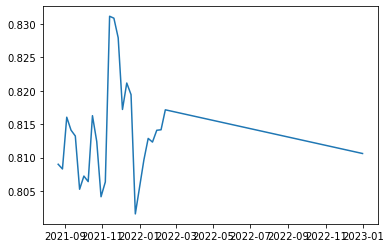

In [256]:
# 26. What is the overall success rate trend over time? 
import matplotlib.pyplot as plt
result = ad_recs_annotated.groupby(['date']).agg({
    'success': ['mean']
})
result = result.reset_index()
result.columns = ['date','success_rate']
plt.plot(result['date'],result['success_rate'])

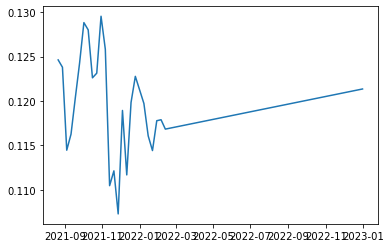

In [257]:
# 27. What is the overall sever defect rate trend over time? 
import matplotlib.pyplot as plt
result = ad_recs_annotated.groupby(['date']).agg({
    'is_sever': ['mean']
})
result = result.reset_index()
result.columns = ['date','sever_defects_rate']
plt.plot(result['date'],result['sever_defects_rate'])

In [ ]:
# 28. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:


In [ ]:
# 29. Identify major traffic shape changes (addition/removal) of major clients

In [ ]:
# 30. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:

In [ ]:
# 31. Identify major traffic shape changes (addition/removal) of major clients

Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [4]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

['2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv',
 '2021_33_JP_Qality_annotation_result.csv']

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

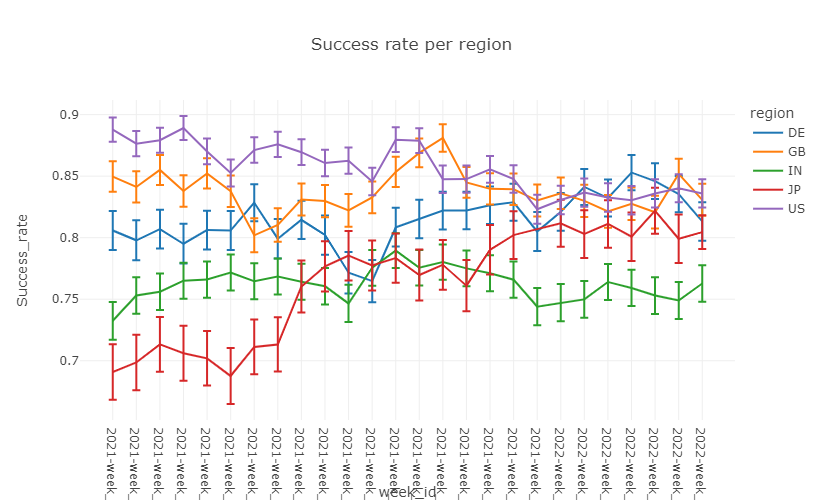

Produce the following requestser proportion graph:

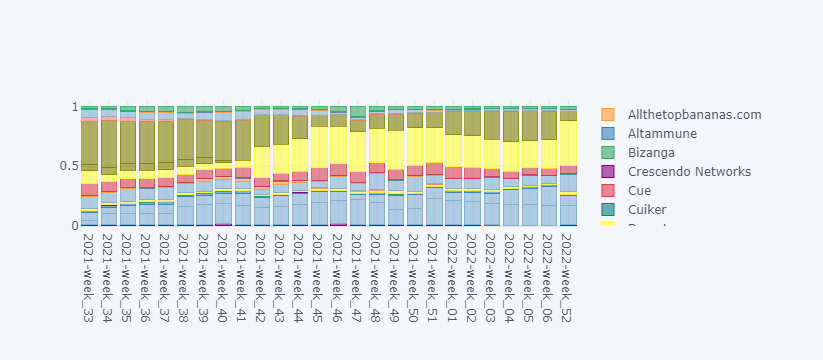

## Appendix

Code to create weekly files:

In [67]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)